## TSP (Traveling Salesman Problem)

Jeder Ort soll einmal besucht werden. Die gesamte Reisestrecke 
 soll möglichst kurz sein und am Ende soll der Handlungsreisenden wieder am Ausgangsort ankommen.
 
TSP ist NP-vollständig, d.h. es wird vermutlich keinen polynomiellen Lösungsalgorithmus geben.

Es gibt viele Näherungsverfahren. In dem __[Video](https://www.youtube.com/watch?v=SC5CX8drAtU)__ werden 3 Verfahren präsentiert:

- Greedy
- 2-Opt
- Simulated Annealing



#### Vereinbarung

**cities** ist eine Liste mit Koordinaten (Positionen) <br>
**path** ist eine Liste mit Indizes der cities, wie sie der Reihe nach besucht werden sollen. Den Anfangspunkt fügen wir am Ende
nicht wieder dazu, das wird bei der Berechnung und beim Anzeigen gemacht.



In [5]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


### Beispiel 1: Berlin52

Die [optimale Lösung](https://www.researchgate.net/figure/The-optimal-solution-of-Berlin52_fig2_221901574) für berlin52 ist 7544.3659

In [6]:
berlin52 = [(565, 575), (25, 185), (345, 750), (945, 685), (845, 655), (880, 660), (25, 230), 
            (525, 1000), (580, 1175), (650, 1130), (1605, 620), (1220, 580), (1465, 200), (1530, 5),
            (845, 680), (725, 370), (145, 665), (415, 635), (510, 875), (560, 365), (300, 465), 
            (520, 585), (480, 415), (835, 625), (975, 580), (1215, 245), (1320, 315), (1250, 400),
            (660, 180), (410, 250), (420, 555), (575, 665), (1150, 1160), (700, 580), (685, 595),
            (685, 610), (770, 610), (795, 645), (720, 635), (760, 650), (475, 960), (95, 260),
            (875, 920), (700, 500), (555, 815), (830, 485), (1170, 65), (830, 610), (605, 625), 
            (595, 360), (1340, 725), (1740, 245)]

In [7]:
def getDistMatrix(cities):
    N = len(cities)
    D = np.zeros((N,N))
    for x in range(N):
        for y in range(x+1,N):
            D[x,y]=math.dist(cities[x],cities[y])
            D[y,x]=D[x,y]
    return D 

 

In [8]:
np.set_printoptions(linewidth=130, precision=0, edgeitems=7)
cities = berlin52
D = getDistMatrix(cities)
print(D)

[[   0.  666.  281.  396.  291.  326.  641. ...  280.  791.  267.   64.  217.  789. 1220.]
 [ 666.    0.  649. 1047.  945.  978.   45. ...  859. 1151.  910.  728.  596. 1422. 1716.]
 [ 281.  649.    0.  604.  509.  543.  611. ...  553. 1072.  505.  288.  463.  995. 1484.]
 [ 396. 1047.  604.    0.  104.   70. 1026. ...  231.  660.  137.  345.  478.  397.  909.]
 [ 291.  945.  509.  104.    0.   35.  924. ...  171.  674.   47.  242.  387.  500.  984.]
 [ 326.  978.  543.   70.   35.    0.  957. ...  182.  662.   71.  277.  414.  465.  955.]
 [ 641.   45.  611. 1026.  924.  957.    0. ...  844. 1157.  890.  702.  585. 1405. 1715.]
 ...
 [ 280.  859.  553.  231.  171.  182.  844. ...    0.  540.  125.  265.  266.  564.  941.]
 [ 791. 1151. 1072.  660.  674.  662. 1157. ...  540.    0.  642.  796.  646.  682.  598.]
 [ 267.  910.  505.  137.   47.   71.  890. ...  125.  642.    0.  225.  343.  523.  980.]
 [  64.  728.  288.  345.  242.  277.  702. ...  265.  796.  225.    0.  265.  742. 1

In [9]:
path0 = list(range(len(berlin52))) 
print(path0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [10]:
def distance(path):
    d = 0
    for i in range(len(path)-1):
        d+=D[path[i],path[i+1]]
    d+=D[path[-1],path[0]]
    return d

distance(path0)

22205.617692710774

Distance = 22205.617692710774, Länge=52


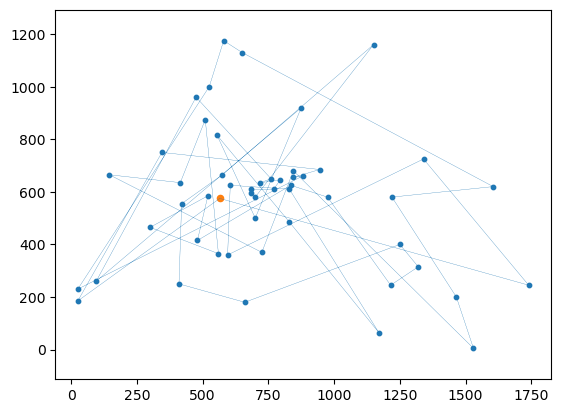

In [11]:
def show(path):
    print(f'Distance = {distance(path)}, Länge={len(path)}')
    xc = [c[0] for c in cities]
    yc = [c[1] for c in cities]
    
    xt = [cities[i][0] for i in path] 
    yt = [cities[i][1] for i in path]
    xt.append(xt[0])
    yt.append(yt[0])

    plt.scatter(xc, yc,s=10)         # these are the cities (points)
    plt.scatter(xt[0],yt[0],s=20)    # startpoint
    plt.plot(xt, yt, linewidth=0.2)  # the edges
    plt.axis('equal')
    plt.show()    
    
    
show(path0)   

#### Greedy


Vom Startpunkt aus wird immer die am nächsten gelegene Stadt besucht, die noch nicht besucht wurde. 


Distance = 8980.918279329191, Länge=52


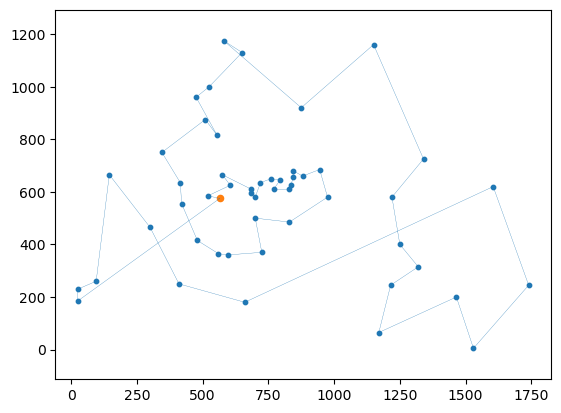

In [12]:
start = 0
path = [start]
visited = {start}

while len(path) < len(cities):
    best = None
    best_val = float('inf')
    
    i = path[-1]
    for j in range(len(cities)):
        if j not in visited and D[i,j] < best_val:
            best = j         
            best_val = D[i,j]
    visited.add(best)
    path.append(best) 
    
show(path)

In [13]:
def greedy(cities,start=0):
    path = [start]
    visited = {start}

    while len(path) < len(cities):
        best = None
        best_val = float('inf')

        i = path[-1]
        for j in range(len(cities)):
            if j not in visited and D[i,j] < best_val:
                best = j         
                best_val = D[i,j]
        visited.add(best)
        path.append(best) 
    return path

In [14]:
best = None
best_val = float('inf')
for i in range(len(cities)):
    path = greedy(cities,start=i)
    val = distance(path)
    if val < best_val:
        best = i
        best_val = val
print(best)

39


Distance = 8182.1915557256725, Länge=52


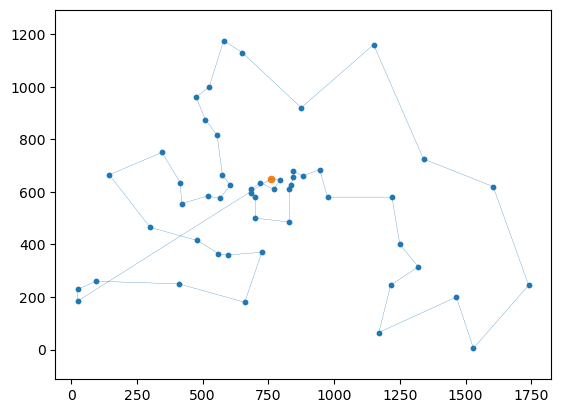

In [15]:
cities = berlin52
D = getDistMatrix(cities)
path = greedy(cities,start=39)
show(path)

#### Greedy mit Two-Opt

<img src='bild1.png' width='600'>

In [16]:
def twoOpt(path):
    N = len(path)
    path.append(path[0])
    improved = True
    while improved:
        improved = False
        for i in range(0, N-2):   
            for j in range(i+2, N):
                if D[path[i],path[j]] + D[path[i+1],path[j+1]] < D[path[i],path[i+1]]+D[path[j],path[j+1]]:
                    path[i+1:j+1] = path[j:i:-1]
                    improved = True
    return path[:-1]

Distance = 7544.365901904088, Länge=52


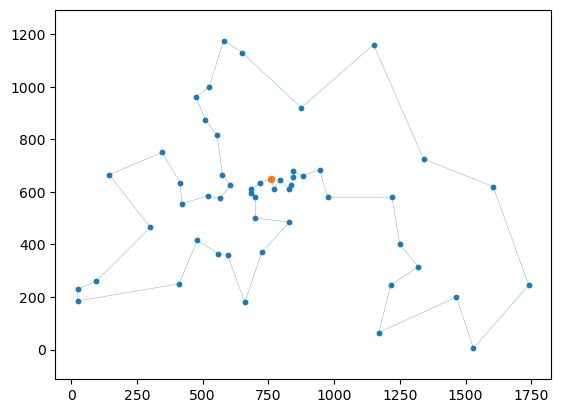

CPU times: total: 141 ms
Wall time: 148 ms


In [17]:
%%time
cities = berlin52
D = getDistMatrix(cities)
path = greedy(berlin52,start=39)
path = twoOpt(path)
show(path)

#### Beispiel 2: Codingame Example 5

300 Städte - Optimales Ergebnis laut Forum: 17112

https://www.codingame.com/ide/puzzle/travelling-salesman 

In [18]:
# 300 Städte
codingame5=[(1585, 817), (1578, 521), (331, 606), (680, 581), (1199, 41), (319, 528), (1682, 957), (1508, 118), (1676, 950), (28, 569), (35, 253), (202, 825), (1144, 332), (1204, 470), (11, 471), (1784, 125), (1759, 930), (42, 643), (616, 753), (264, 20), (842, 852), (1705, 893), (1509, 872), (1105, 283), (106, 761), (542, 121), (1510, 501), (325, 939), (1340, 833), (47, 676), (12, 113), (1325, 805), (1549, 881), (995, 396), (1392, 290), (768, 533), (1572, 255), (537, 958), (795, 148), (4, 951), (1733, 249), (1318, 926), (30, 609), (955, 902), (880, 807), (746, 110), (853, 869), (1619, 738), (1584, 161), (1254, 739), (1163, 428), (258, 220), (1759, 617), (320, 635), (456, 37), (50, 608), (1585, 955), (1354, 297), (1299, 667), (1305, 181), (1250, 18), (1497, 987), (1616, 147), (389, 832), (11, 417), (194, 348), (572, 127), (367, 237), (1272, 828), (1181, 98), (803, 622), (800, 415), (1645, 672), (885, 722), (1311, 688), (1458, 599), (358, 422), (1576, 691), (7, 398), (999, 641), (27, 417), (760, 110), (979, 559), (689, 924), (364, 672), (1342, 453), (1055, 445), (1156, 901), (1451, 932), (957, 196), (602, 328), (256, 264), (1264, 19), (1482, 741), (728, 809), (326, 903), (342, 557), (195, 405), (829, 298), (1319, 353), (277, 741), (1112, 189), (1702, 137), (708, 439), (1045, 650), (416, 26), (467, 827), (62, 110), (388, 541), (556, 380), (876, 132), (1289, 552), (1750, 589), (1032, 993), (212, 933), (13, 410), (516, 324), (1172, 899), (813, 427), (833, 831), (63, 721), (370, 897), (1460, 532), (1474, 577), (1341, 868), (1703, 171), (1135, 679), (1112, 221), (1182, 294), (1068, 577), (1762, 954), (125, 741), (301, 98), (1334, 11), (1409, 28), (1524, 763), (1588, 172), (1148, 470), (154, 623), (499, 479), (1453, 442), (416, 294), (508, 428), (920, 918), (95, 363), (244, 956), (530, 935), (238, 598), (1532, 936), (1587, 553), (261, 671), (547, 810), (963, 608), (1742, 359), (1675, 223), (46, 796), (1662, 996), (1036, 443), (758, 864), (1543, 23), (1741, 65), (1483, 949), (369, 300), (527, 162), (163, 160), (51, 850), (900, 70), (1123, 588), (351, 274), (625, 860), (410, 524), (1730, 15), (892, 779), (1681, 356), (1026, 481), (460, 352), (557, 26), (864, 930), (518, 688), (1461, 221), (1662, 24), (1071, 211), (1561, 143), (1721, 248), (224, 100), (830, 483), (1243, 687), (1503, 673), (273, 116), (61, 29), (395, 840), (1635, 401), (1092, 500), (1128, 249), (1628, 362), (1249, 991), (949, 181), (1313, 689), (710, 850), (970, 89), (1736, 669), (854, 845), (1381, 696), (972, 168), (1355, 561), (1404, 583), (471, 187), (185, 893), (1504, 274), (709, 988), (750, 508), (387, 527), (1023, 398), (1393, 650), (1561, 664), (1694, 714), (479, 888), (128, 201), (1529, 762), (295, 326), (123, 675), (1712, 155), (295, 140), (719, 104), (579, 467), (106, 520), (204, 257), (66, 665), (895, 174), (1077, 431), (938, 444), (977, 156), (480, 224), (1149, 881), (1201, 185), (1303, 181), (1055, 890), (306, 280), (1361, 564), (1756, 57), (1589, 518), (376, 414), (181, 445), (86, 35), (966, 169), (147, 488), (255, 1), (582, 630), (350, 402), (810, 331), (1524, 802), (1743, 987), (468, 887), (980, 973), (744, 461), (1036, 584), (1369, 239), (698, 202), (344, 259), (15, 520), (780, 857), (585, 107), (277, 258), (1460, 906), (1451, 181), (721, 11), (1364, 293), (806, 44), (391, 363), (1446, 603), (773, 805), (1649, 409), (876, 958), (1321, 544), (1434, 544), (949, 214), (287, 467), (1302, 736), (952, 179), (892, 949), (350, 839), (1574, 533), (303, 161), (1550, 967), (1604, 53), (554, 694), (1158, 631), (880, 258), (845, 805), (33, 826), (308, 359), (1760, 659), (457, 62), (802, 236), (1499, 80), (657, 331), (1707, 843), (843, 587), (1558, 270), (280, 960)]
cities = codingame5
D = getDistMatrix(cities)
path0 = list(range(len(cities))) 
distance(path0)


223168.27703251966

Distance = 17888.81141334797, Länge=300


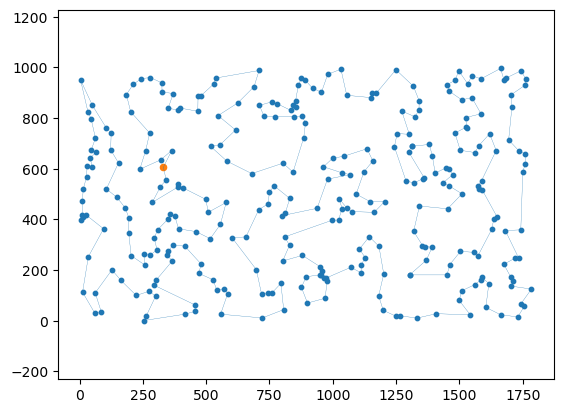

CPU times: total: 500 ms
Wall time: 508 ms


In [20]:
%%time
# start = 2 ist bester Start
cities = codingame5
D = getDistMatrix(cities)
path = greedy(cities,start=2)
path = twoOpt(path)
show(path)

#### Beispiel 3 : Weniger Krumm

In [23]:
def readData(nr):
    f = open('wenigerKrumm'+str(nr)+'.txt')
    lines = f.readlines() 
    data = []
    for line in lines:
        x, y = line.split()
        data.append((float(x), float(y)))  
    f.close()
    return data

Distance = 3729.47232728765, Länge=100


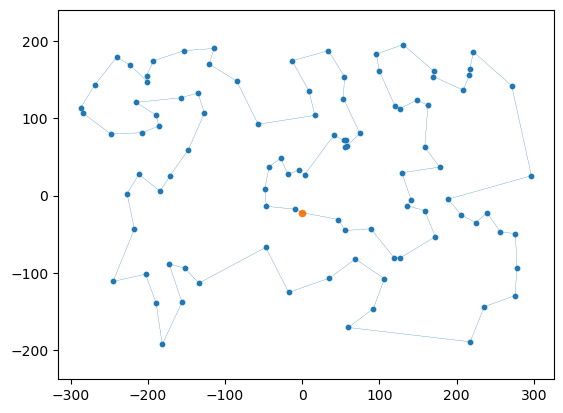

In [28]:
cities = readData(7)
D = getDistMatrix(cities)
best = None
best_val = float('inf')
for i in range(len(cities)):
    path = greedy(cities,start=i)
    path = twoOpt(path) 
    val = distance(path)
    if val < best_val:
        best_val = val
        best = i
path = greedy(cities,start=best)
path = twoOpt(path) 
show(path)